In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


import sys 
import os
path = os.path.dirname(os.getcwd())
sys.path.append(path)
from lib import *

In [4]:
# Results Import
optimization_result = pd.read_csv("../results/1_optimization_result.csv")
baseline_result = pd.read_csv("../results/2_baseline.csv")
simpleCA_result = pd.read_csv("../results/3_simpleCA_result.csv")

randomEB_result = pd.read_csv("../results/4_randomEB_optimization.csv")
leftover_result = pd.read_csv("../results/5_leftover_optimization_result.csv")
leftover_resultWeighted = pd.read_csv("../results/7_leftoverWeighted_optimization_result.csv")

#op_baseline_result = pd.read_csv("../results/8_baselineOptimization_result.csv")


# Data Import
df = pd.read_csv(r'../data/DE_2021.csv')
ci_data_2021_hourly = df['carbon_intensity_avg']
df = pd.read_csv(r'../data/projectcount_wikiDE_2015.csv')
clickData_hourly_2015 = df["De"].tolist()
clickData_hourly_2015 = clickData_hourly_2015[24:] + clickData_hourly_2015[0:24]

In [5]:
df = pd.read_csv(r'../data/projectcount_wikiDE_2014.csv')
clickData_hourly_2014 = df["de"]
#clickData_hourly_2014 = clickData_hourly_2014[48:] + clickData_hourly_2014[0:48]

df = pd.read_csv(r'../data/DE_2020.csv')
ci_data = df['carbon_intensity_avg']

# 2020
ed = calcEnergyDemandFromAVG(clickData_hourly_2014)
carbonEmission = calcCarbonEmissionFromEnergyDemand(ed,ci_data)
#carbonEmission = sum(carbonEmission)

#carbonBudget_anually = carbonEmission * 0.923

print(len(carbonEmission))

8760


# Carbon Footprint

/tmp/ipykernel_577213/2392836201.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  sorted_CF.set_yticklabels([0.0,0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6], fontdict={'size': 15})


Text(0, 0.5, 'Carbon Emissions (in gCO2eq)')

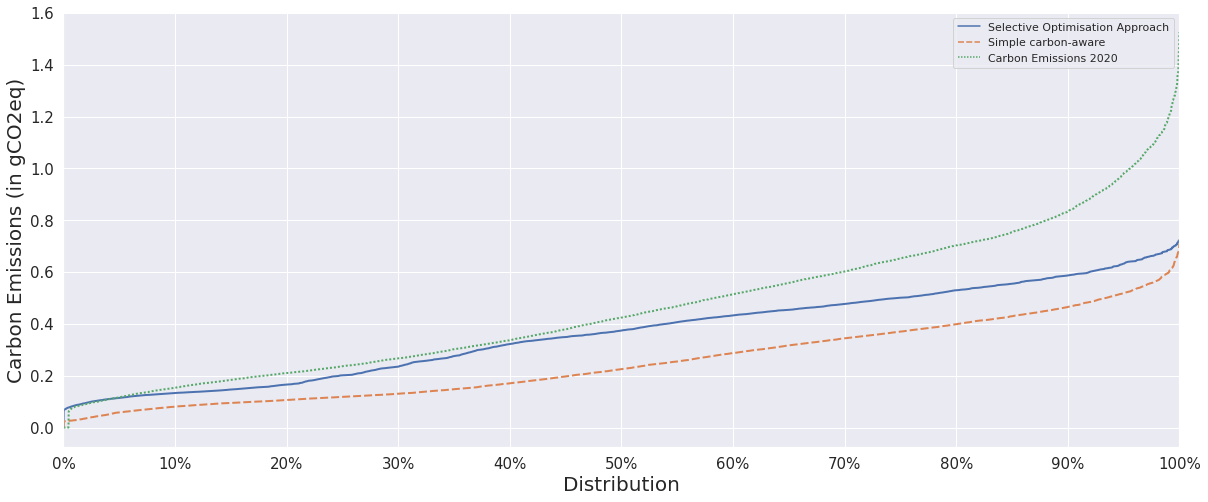

In [6]:
a = sorted(optimization_result["ce"])
b = sorted(simpleCA_result["ce"])
c = sorted(carbonEmission)

data = pd.DataFrame({'Selective Optimisation Approach': a, 'Simple carbon-aware': b, 'Carbon Emissions 2020': c })

sns.set(rc={'figure.figsize':(20,8)})

sorted_CF = sns.lineplot(data=data, linewidth=2)
sorted_CF.set(xlim=(0,8760))
xlabels = [math.ceil(x*876) for x in range(0,11)]
percentage = [format(x*10) + '%' for x in range(0,11)]
sorted_CF.set_xticks(xlabels)
sorted_CF.set_xticklabels(percentage, fontdict={'size': 15})

sorted_CF.set_yticklabels([0.0,0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6], fontdict={'size': 15})

sorted_CF.set_xlabel('Distribution', fontdict={'size': 20})
sorted_CF.set_ylabel('Carbon Emissions (in gCO2eq)', fontdict={'size': 20})

#sorted_EBU.axes.set_title("CDF Energy Budget Utilization",fontsize=20)

In [7]:
# Save plot to disk
fig = sorted_CF.get_figure()
fig.savefig("../img/sorted_CF.png", bbox_inches = 'tight')

-5509059.564


Text(0, 0.5, 'Carbon Emissions (in gCO2eq)')

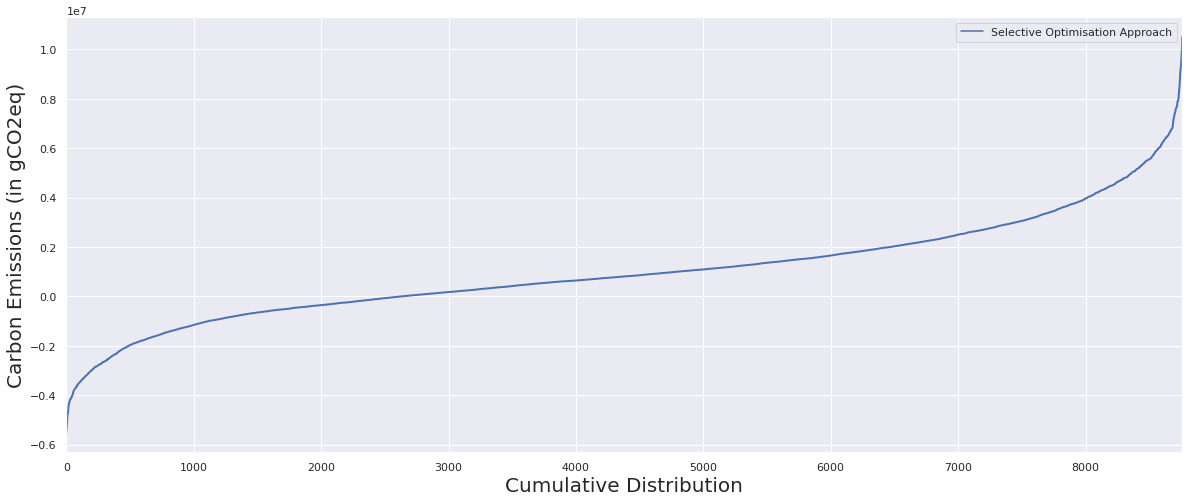

In [8]:
carbonEmission = carbonEmission[48:] + carbonEmission[0:48]


a = sorted(carbonEmission-optimization_result["ce"])
print(min(a))

data = pd.DataFrame({'Selective Optimisation Approach': a})

sns.set(rc={'figure.figsize':(20,8)})

sorted_EBU = sns.lineplot(data=data, linewidth=2)
sorted_EBU.set(xlim=(0,8760))

sorted_EBU.set_xlabel('Cumulative Distribution', fontdict={'size': 20})
sorted_EBU.set_ylabel('Carbon Emissions (in gCO2eq)', fontdict={'size': 20})

#sorted_EBU.axes.set_title("CDF Energy Budget Utilization",fontsize=20)

## CE of Budget adjustments approaches

/tmp/ipykernel_577213/950864873.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  sorted_CE_leftover.set_yticklabels([0.0,0.0,0.2,0.4,0.6,0.8,1.0,1.2], fontdict={'size': 15})


Text(0, 0.5, 'Carbon Emissions (in gCO2eq)')

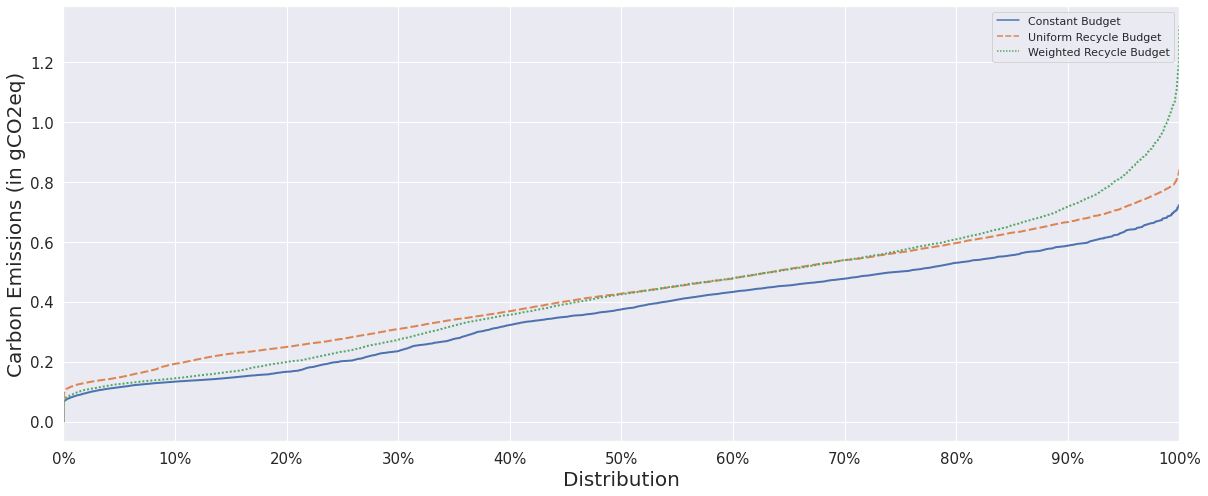

In [19]:
a = sorted(optimization_result["ce"])
b = sorted(leftover_result["ce"])
c = sorted(leftover_resultWeighted["ce"])

data = pd.DataFrame({'Constant Budget': a, 'Uniform Recycle Budget': b, 'Weighted Recycle Budget': c })

sns.set(rc={'figure.figsize':(20,8)})

sorted_CE_leftover = sns.lineplot(data=data, linewidth=2)
sorted_CE_leftover.set(xlim=(0,8760))

xlabels = [math.ceil(x*876) for x in range(0,11)]
percentage = [format(x*10) + '%' for x in range(0,11)]
sorted_CE_leftover.set_xticks(xlabels)
sorted_CE_leftover.set_xticklabels(percentage, fontdict={'size': 15})

sorted_CE_leftover.set_yticklabels([0.0,0.0,0.2,0.4,0.6,0.8,1.0,1.2], fontdict={'size': 15})

sorted_CE_leftover.set_xlabel('Distribution', fontdict={'size': 20})
sorted_CE_leftover.set_ylabel('Carbon Emissions (in gCO2eq)', fontdict={'size': 20})

In [20]:
# Save plot to disk
fig = sorted_CE_leftover.get_figure()
fig.savefig("../img/sorted_CBU_leftover.png", bbox_inches = 'tight')

### Statistics

In [22]:

count = 0
for i in range(8760):
    if leftover_resultWeighted["ce"][i] > leftover_result["ce"][i]:
        count += 1

#optimization_result["ce"]


print("Weighted has higher Emissions in: " + str(count) + " hours")
print("Weighted has higher Emissions in (in %): " + str(count/8760) + " hours")

Weighted has higher Emissions in: 1951 hours
Weighted has higher Emissions in (in %): 0.22271689497716896 hours


# Statistics 

In [30]:
cReduced = sum(carbonEmission)-sum(optimization_result["ce"])

print("Amount of carbon reduced " + str(cReduced))
print("Amount of carbon reduced in per cent " + str(cReduced / sum(carbonEmission) * 100))

Amount of carbon reduced 8908187650.816814
Amount of carbon reduced in per cent 21.83402148453995


In [31]:
# Revenue comparision 2020 and selective optimization


qD = calcQFromAVG(clickData_hourly_2014)

In [35]:
sumQ = 0
for i in range(len(qD)):
    sumQ += qD[i][-1]

print(sumQ)

8760
4469221421.7555


In [38]:
print("Difference in Q " + str(sumQ - sum(optimization_result["user-throughput"])))
print("Difference in Q in per cent " + str((sumQ - sum(optimization_result["user-throughput"])) / sumQ * 100))

Difference in Q -762026309.3619566
Difference in Q in per cent -17.050538280616994
